BIBLIOTECAS

In [42]:
# LEITURA DOS DADOS
import pandas as pd
import chardet
from math import sqrt

# MANIPULAÇÃO DE DADOS
from datetime import datetime

# VISUALIZAÇÃO DE DADOS
import seaborn as sns
import matplotlib.pyplot as plt

# MODELO DE MACHINE LEARNING
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# PRE PROCESSAMENTO
from sklearn.preprocessing import PowerTransformer

# WARNINGS
import warnings
warnings.simplefilter(action='ignore')

IDENTIFICANDO ENCODING

In [43]:
caminho_arquivo = "../data/data.csv"
with open(caminho_arquivo, 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [44]:
df_commerce = pd.read_csv(caminho_arquivo, encoding= "utf-8")
df_commerce.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


***STEP***

Analise descritiva:
- Analise dos dados, como estão distribuidos, quais são os tipos de dados

In [45]:
df_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [46]:
df_commerce.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


***STEP***

Analise Exploratoria:

- Qualidade dos dados, se possui dados duplicados, dados nulos, outliers
- Realizar consultas, visualização grafica dos dados, analise estatistica

In [47]:
# VALORES FALTANTES
dados_faltantes = pd.DataFrame({'Coluna': df_commerce.columns, 'Dados Faltantes': df_commerce.isna().sum()}).reset_index(drop=True).sort_values(by="Dados Faltantes", ascending=False)
display(dados_faltantes)

,Coluna,Dados Faltantes
6,CustomerID,135080
2,Description,1454
0,InvoiceNo,0
1,StockCode,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
7,Country,0


In [48]:
dados_faltantes["Dados Faltantes"].sum()

136534

In [49]:
# VALORES DUPLICADOS
df_commerce[df_commerce.duplicated(keep = "first")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


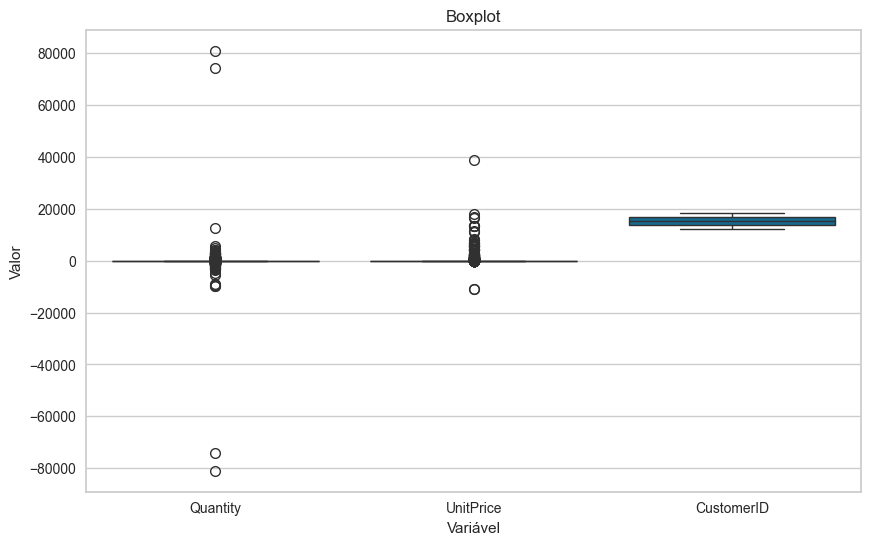

In [50]:
# OUTLIERS

colunas_numericas = df_commerce.select_dtypes(include=['float', 'int'])
df_melted = colunas_numericas.melt(var_name='Variável', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Variável', y='Valor', data=df_melted)
plt.title("Boxplot")
plt.show()

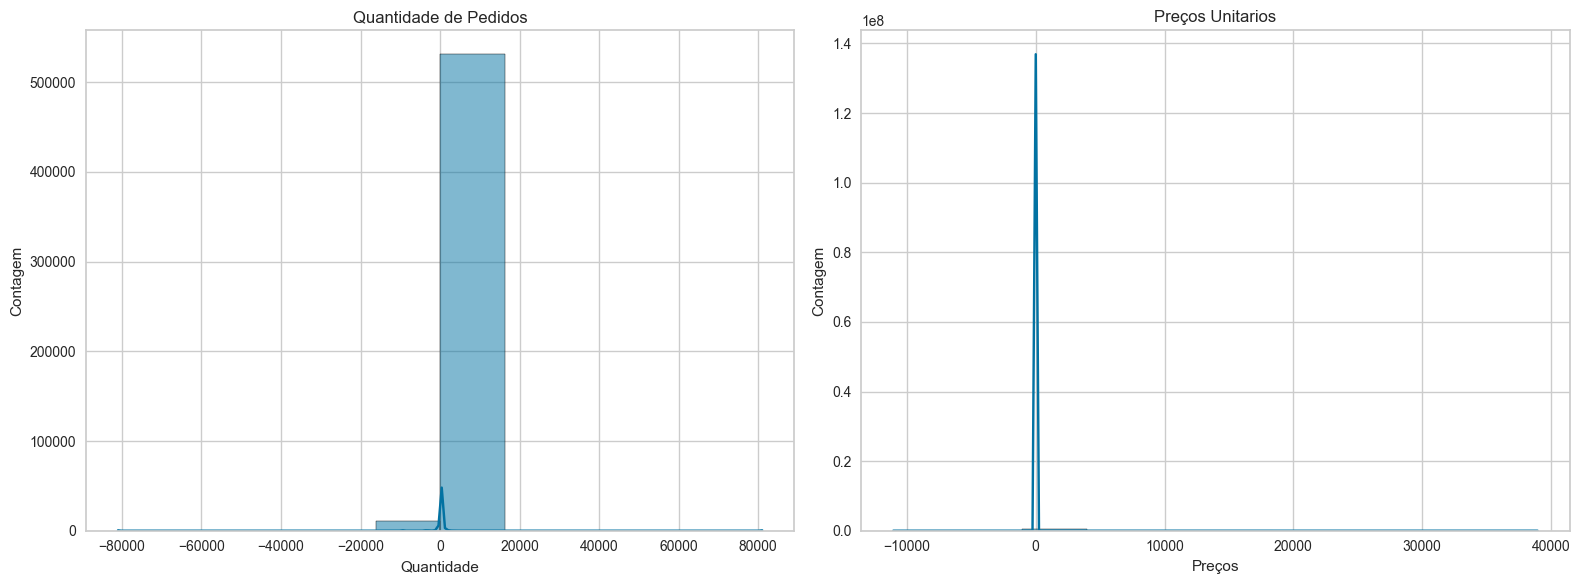

In [51]:
# ANALISANDO AS COLUNAS "QUANTITY" E "UNITPRICE"
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.histplot(data=df_commerce, x='Quantity', bins=10, kde=True, ax=axes[0])
axes[0].set_title('Quantidade de Pedidos')
axes[0].set_xlabel('Quantidade')
axes[0].set_ylabel('Contagem')

sns.histplot(data=df_commerce, x='UnitPrice', bins=10, kde=True, ax=axes[1])
axes[1].set_title('Preços Unitarios')
axes[1].set_xlabel('Preços')
axes[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

<Axes: >

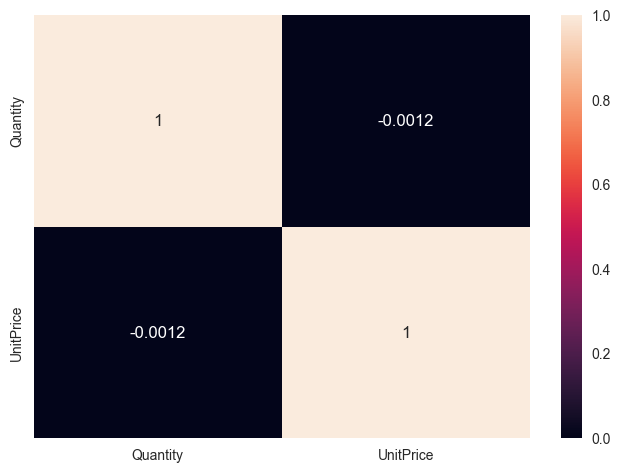

In [52]:
# CORRELAÇÃO ENTRE AS COLUNAS NUMERICAS
sns.heatmap(df_commerce[["Quantity","UnitPrice"]].corr(), annot =True)

In [53]:
df_commerce[["Description","CustomerID","Country"]].nunique()

Description    4223
CustomerID     4372
Country          38
dtype: int64

In [54]:
df_commerce["Country"].value_counts().head(5)

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64

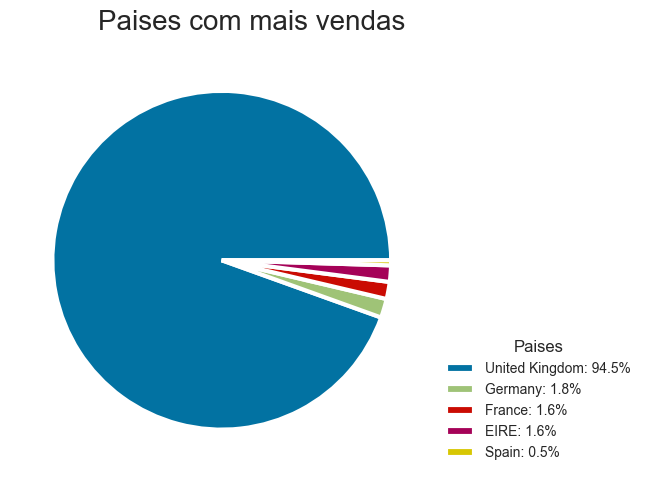

In [55]:
best_countrys = df_commerce["Country"].value_counts().head(5)
fig, ax = plt.subplots()

total = best_countrys.sum()
percentages = best_countrys / total * 100

wedges, texts = ax.pie(best_countrys, labeldistance=1.15,
                       wedgeprops={'linewidth': 3, 'edgecolor': 'white'})

plt.suptitle('Paises com mais vendas', fontsize=20, y=0.95, x= 0.55)

ax.legend(wedges, [f'{label}: {percentage:.1f}%' for label, percentage in zip(best_countrys.index, percentages)],
          title="Paises", loc="lower left", bbox_to_anchor=(1, 0))
plt.show()

In [56]:
df_commerce.groupby("Description")["InvoiceNo"].count().sort_values(ascending = False).head(5)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: InvoiceNo, dtype: int64

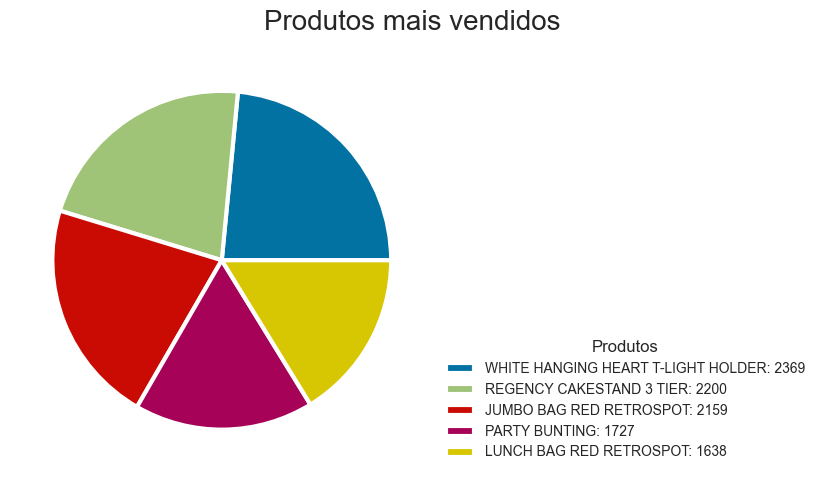

In [57]:
best_itens_sale = df_commerce.groupby("Description")["InvoiceNo"].count().sort_values(ascending = False).head(5)
fig, ax = plt.subplots()


wedges, texts = ax.pie(best_itens_sale, labeldistance=1.15,
                       wedgeprops={'linewidth': 3, 'edgecolor': 'white'})

plt.suptitle('Produtos mais vendidos', fontsize=20, y=0.95, x= 0.75)

ax.legend(wedges, [f'{label}: {value}' for label, value in zip(best_itens_sale.index, best_itens_sale)],
          title="Produtos", loc="lower left", bbox_to_anchor=(1, 0))
plt.show()

***CONCLUSÃO***

Referente analise sobre os dados, temos as seguintes conclusões:
- Temos uma base total com **541.909** dados referente a transação de compras.
- Temos **4372** clientes na base.
- Catalogo de produtos com 4223 itens.
- Vendas ativas em **38** paises com destaque para **United Kingdom** representando quase **95%**.
- A distribuição dos produtos mais vendidos são bem proximos entre si, tendo o produto **WHITE HANGING HEART T-LIGHTHOLDER** como item com a maior venda.



Nessa etapa de analise descritiva e exploratoria inicial, alguns pontos chamaram a atenção:
- As colunas possuem tipos de dados que nao condiz: **InvoiceNo**, **InvoiceDate**, **CustomerID**.
- As colunas númericas tem um desvio padrão muito alto sobre a média, indicando um desbalanceamento dos dados
- As colunas "Quantity" e "UnitPrice", possui dados negativos que fazem sentidos para quantidade e preços, comprovando a existencia de outliers, validada pelo grafico bloxplot
- Ainda na analise descritiva notamos que as colunas possui um grandeza diferente entre si, necessitando de uma normalização ou padronização dos dados
- Possui dados faltantes nas colunas **CustomerID** e **Description**, totalizando 136.534 dados.
- Possui dados duplicados no DF em um total de 5.268


DATA PREPARATION

In [58]:
# DADOS FALTANTES
df_missing = (
    df_commerce.isna().sum()
.to_frame("missing_count")
.join((df_commerce.isna().sum() / len(df_commerce))
.to_frame("missing_pct"))
.sort_values(by ="missing_count",ascending=False))

df_missing.style.format('{:.1%}', subset=["missing_pct"])

,missing_count,missing_pct
CustomerID,135080,24.9%
Description,1454,0.3%
InvoiceNo,0,0.0%
StockCode,0,0.0%
Quantity,0,0.0%
InvoiceDate,0,0.0%
UnitPrice,0,0.0%
Country,0,0.0%


In [59]:
df = df_commerce.dropna()

In [60]:
# REMOVENDO DADOS DUPLICADOS
(
  df
  .groupby(df.columns.to_list(),dropna = False)
  .size()
  .to_frame("n_duplicates")
  .query("n_duplicates>1")
  .sort_values("n_duplicates",ascending= False)
  .head(5)
)


n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6

In [61]:
df.drop_duplicates(keep = "first")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [62]:
# CORRIGINDO TIPOS DE DADOS
df[df['InvoiceNo'].str.contains('[a-zA-Z]')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [63]:
df["InvoiceNo"] = df["InvoiceNo"].str.slice(start=1)
df[df['InvoiceNo'].str.contains('[a-zA-Z]')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [64]:
cols_numeric = ["InvoiceNo", "CustomerID"]

for col in cols_numeric:
  df[col] = df[col].astype(int)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

***STEP***
- Corrigir os desbalanceamento
- Tratar os Outliers

In [65]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829,406829.000000,406829.000000
mean,71526.141074,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,36365.000000,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,49546.000000,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,62370.000000,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,72681.000000,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,581569.000000,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,74091.659009,248.693370,NaN,69.315162,1713.600303


In [66]:
df = df[(df['Quantity'] > 0) & (df["UnitPrice"] > 0)]

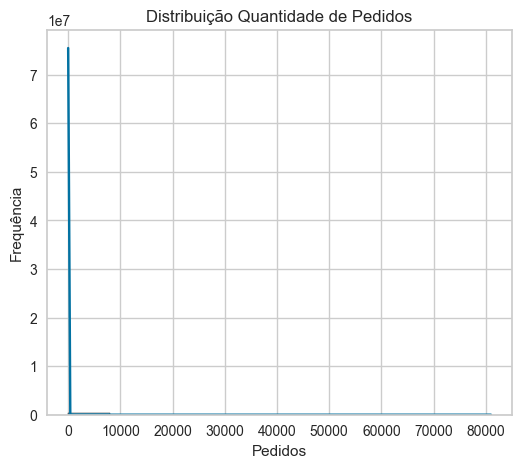

In [67]:
plt.figure(figsize=(6, 5))
sns.histplot(df["Quantity"], color='b', bins=10, kde=True)
plt.title("Distribuição Quantidade de Pedidos")
plt.xlabel("Pedidos")
plt.ylabel("Frequência")
plt.show()

In [68]:
# ANALISE DA VARIAVEL "QUANTITY"

df.query("Quantity> 12")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,36367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom
26,36370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France
27,36370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France
30,36370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France
31,36370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583,France
...,...,...,...,...,...,...,...,...
541876,81585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,2011-12-09 12:31:00,0.85,15804,United Kingdom
541882,81585,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-12-09 12:31:00,0.42,15804,United Kingdom
541883,81585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804,United Kingdom
541891,81586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom


In [69]:
df.query("Quantity>1000")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,36809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299,United Kingdom
4945,36830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom
4946,36830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754,United Kingdom
6365,36890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156,EIRE
16435,37659,22189,CREAM HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.31,18102,United Kingdom
...,...,...,...,...,...,...,...,...
533812,81115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195,United Kingdom
534952,81175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646,Netherlands
540070,81458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949,United Kingdom
540071,81459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949,United Kingdom


In [70]:
percentage = (len(df.query("Quantity>1000")) / len(df)) * 100

print(f"A porcentagem de quantidade de pedidos acima de 100 itens é de  {percentage:.2f}% sobre todos nossos dados")

A porcentagem de quantidade de pedidos acima de 100 itens é de  0.03% sobre todos nossos dados


In [71]:
df = df[(df['Quantity'] <= 1000)]

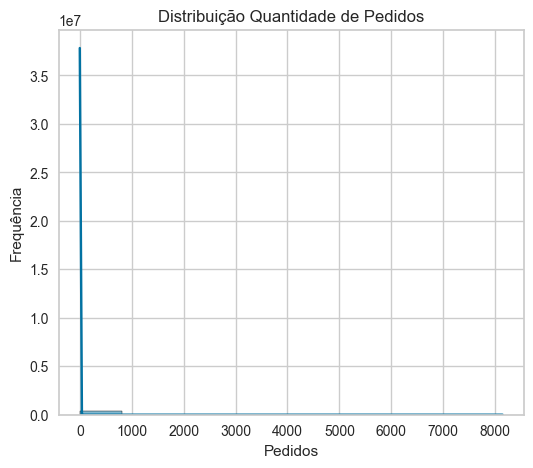

In [72]:
plt.figure(figsize=(6, 5))
sns.histplot(df["UnitPrice"], color='b', bins=10, kde=True)
plt.title("Distribuição Quantidade de Pedidos")
plt.xlabel("Pedidos")
plt.ylabel("Frequência")
plt.show()

In [73]:
# ANALISE DA VARIAVEL "UNIT PRICE"
df.query("UnitPrice> 1000")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
117054,46328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911,EIRE
117055,46329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911,EIRE
144826,48813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744,Singapore
144828,48813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744,Singapore
144829,48820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744,Singapore
145831,48913,M,Manual,1,2011-04-05 09:45:00,1136.30,12669,France
150615,49468,M,Manual,1,2011-04-08 14:27:00,1867.86,17940,United Kingdom
173382,51697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom
200745,54155,M,Manual,1,2011-05-23 11:26:00,1241.98,12757,Portugal
201553,54301,M,Manual,1,2011-05-23 14:46:00,1241.98,12757,Portugal


In [74]:
itens_manual = df.query("Description == 'Manual'")
print(itens_manual["UnitPrice"].min())
print(itens_manual["UnitPrice"].max())

0.06
4161.06


In [75]:
percentage = (len(df.query("UnitPrice>1000")) / len(df)) * 100

print(f"A porcentagem de produtos com o valor superior a R$1.000 é de {percentage:.2f}% sobre todos nossos dados")

A porcentagem de produtos com o valor superior a R$1.000 é de 0.01% sobre todos nossos dados


In [76]:
df = df[(df['UnitPrice'] <= 1000)]

In [77]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397758.000000,397758.000000,397758,397758.000000,397758.000000
mean,60617.996877,12.172572,2011-07-10 23:55:08.793236224,2.989840,15294.418026
min,36365.000000,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,49234.250000,2.000000,2011-04-07 11:13:00,1.250000,13969.000000
50%,61893.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,72090.000000,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,81587.000000,1000.000000,2011-12-09 12:50:00,908.160000,18287.000000
std,13105.778190,31.788318,NaN,6.995346,1713.107323


In [78]:
df[["Quantity","UnitPrice"]].corr()

,Quantity,UnitPrice
Quantity,1.00000,-0.06802
UnitPrice,-0.06802,1.00000


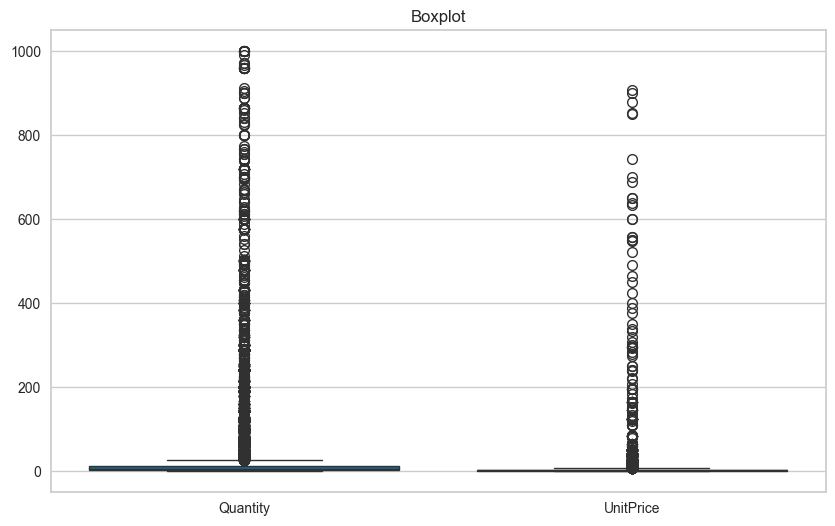

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Quantity","UnitPrice"]])
plt.title("Boxplot")
plt.show()

***STEP***
- Feature Engineering

In [80]:
# CRIANDO UMA NOVA COLUNA COM OS CUSTOS TOTAIS
df["Total_price"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,36365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,36365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,36365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,36365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,36365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [81]:
# REALIZANDO A METRICA DE RFV
today = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfv = df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (today - x.max()).days,'InvoiceNo':'nunique','Total_price':'mean'}).rename(columns={'InvoiceDate':'Recency','InvoiceNo': 'Frequency','Total_price': 'Value'})
rfv.head()

,Recency,Frequency,Value
CustomerID,,,
12347,2,7,23.681319
12348,75,4,57.975484
12349,19,1,24.076027
12350,310,1,19.670588
12352,36,8,29.482824


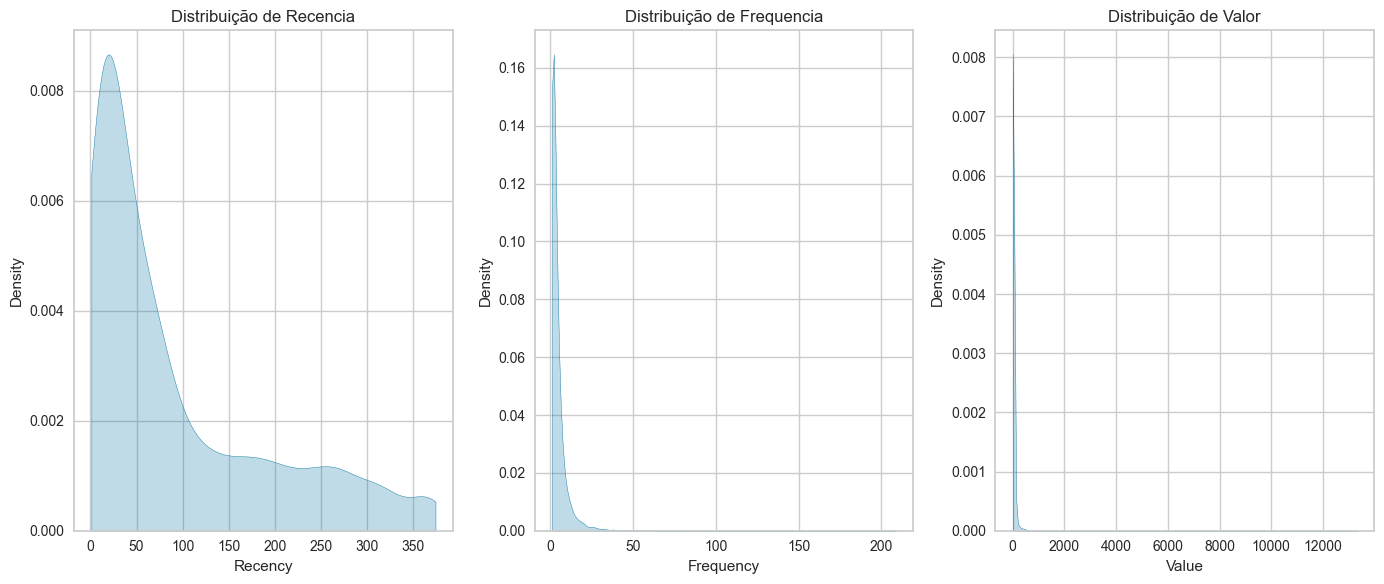

In [82]:
fig, axes = plt.subplots(1,3, figsize=(14,6))

sns.kdeplot(data=rfv, x='Recency', ax=axes[0], fill=True, cut=0)
axes[0].set_title('Distribuição de Recencia')

sns.kdeplot(data=rfv, x='Frequency', ax=axes[1], fill=True, cut=0)
axes[1].set_title('Distribuição de Frequencia')

sns.kdeplot(data=rfv, x='Value', ax=axes[2], fill=True, cut=0)
axes[2].set_title('Distribuição de Valor')

plt.tight_layout()

***CONCLUSÃO***

- Foi removido os dados faltantes nas colunas **CustomerID** e **Description**, pode ser tratar de dados exclusivos não é possivel tratar com algum metodo de preenchimento.
- Foi identificados cincos codigos de transação que estavam duplicados, filtramos a quantidade de repeticoes de cada uma delas e todas elas foram removidas.
- Corrigimos os tipos de dados das colunas mencionadas na etapa anterior
- Fizemos a distribuição dos dados das colunas **Quantity** e **UnitPrice**, removemos os dados negativos de cada uma delas.
- A coluna **Quantity** e **UnitPrice** possuia dados com valores muito altos, mas por se tratar de quantidade de produtos e preços faz sentido ter valores maiores, realizamos um filtro e notamos que acima de 1000 itens por pedido e no valor 1.000 us havia poucos dados representando 0.3% e 0.1% respectivamente da base total, então limitamos a quantidade de itens por pedidos ate 1000 e no valor de 1.000 us. A decisão de limitar essas colunas foi para que o modelo tenha o melhor desempenho na hora de treinar e prever, não deixando com alto vies e sensivel a outliers. **Obs.** os itens que tinham valores acima de R$ 1.000 a maioria se tratava do item "Manual" que após uma ánalise mais a fundo notamos que fazia muito sentido, pois era o mesmo item com valores divergentes, mesmo dentro da mesma região.
- Por fim realizamos a feature engineering, construimos uma coluna com os custos totais de cada transação, depois criamos as metricas de **RFV**, que consiste na **Recência -> Quantidade de dias desde a ultima compra. Frequencia -> Quantidade de compras nesse periodo. Valor -> Valor medio gastado nesse periodo**.

DATA MODELLING

***STEP***
- Normalização


In [83]:
rfv.describe()

,Recency,Frequency,Value
count,4331.000000,4331.000000,4331.000000
mean,92.499885,4.268067,34.172630
std,99.922278,7.674224,221.627090
min,1.000000,1.000000,1.450000
25%,18.000000,1.000000,12.276553
50%,51.000000,2.000000,17.704078
75%,142.000000,5.000000,24.736250
max,374.000000,209.000000,13305.500000


In [84]:
pt = PowerTransformer()

rfv_transform = pt.fit_transform(rfv)
rfv_transform = pd.DataFrame(rfv_transform, index=rfv.index, columns=rfv.columns)

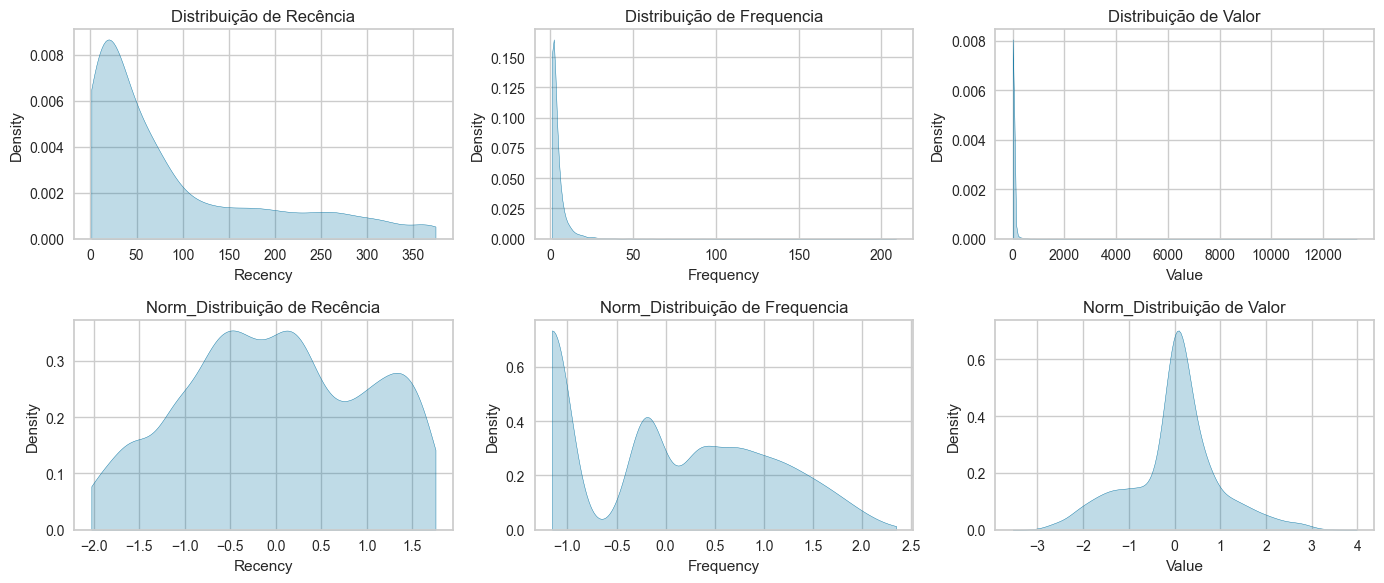

In [85]:
fig, axes = plt.subplots(2,3, figsize=(14,6))

sns.kdeplot(data=rfv, x='Recency', ax=axes[0,0], fill=True, cut=0)
axes[0,0].set_title('Distribuição de Recência')
sns.kdeplot(data=rfv, x='Frequency', ax=axes[0,1], fill=True, cut=0)
axes[0,1].set_title('Distribuição de Frequencia')
sns.kdeplot(data=rfv, x='Value', ax=axes[0,2], fill=True, cut=0)
axes[0,2].set_title('Distribuição de Valor')

sns.kdeplot(data=rfv_transform, x='Recency', ax=axes[1,0], fill=True, cut=0)
axes[1,0].set_title('Norm_Distribuição de Recência')
sns.kdeplot(data=rfv_transform, x='Frequency', ax=axes[1,1], fill=True, cut=0)
axes[1,1].set_title('Norm_Distribuição de Frequencia')
sns.kdeplot(data=rfv_transform, x='Value', ax=axes[1,2], fill=True, cut=0)
axes[1,2].set_title('Norm_Distribuição de Valor')

plt.tight_layout()

***STEP>***

- Identificando a quantidade de Cluster(*metodo Kelbow*)

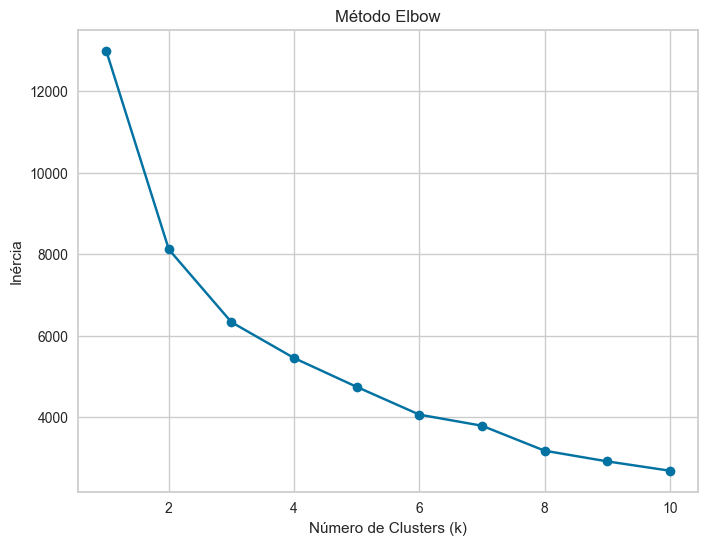

In [86]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfv_transform)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método Elbow')
plt.show()

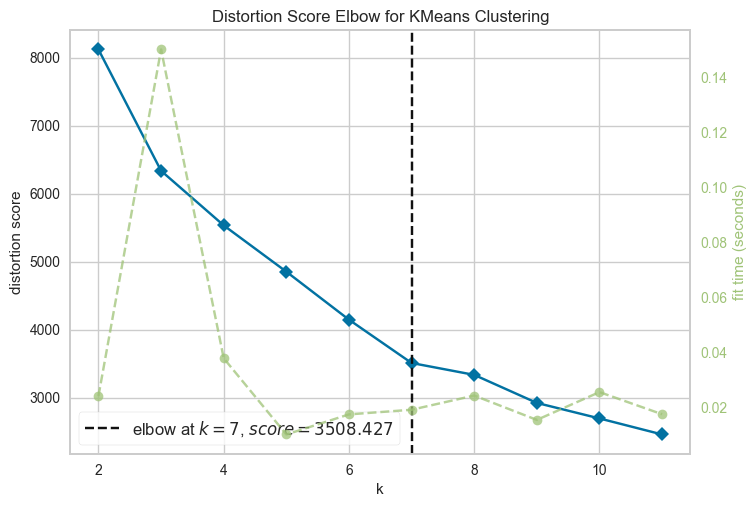

In [87]:
# IDENTIFICANDO O NUMERO IDEAL DE CLUSTERS
kelbow_visualizer(KMeans(),rfv_transform,k = 11);

- Atraves do metodo Kelbow, determinou que o k=6 é quantidade ideal de clusters para nosso modelo, mas por analisar o grafico de cotovelo, é mais adequado utilizar tres clusters, onde realmente tem a quebra da inertia.

***STEP***

- Aplicando o K-means
- Analisando o modelo

In [88]:
# TREINANDO O MODELO
kmeans = KMeans(n_clusters =3, random_state=42)

In [89]:
# PREDIÇÃO
rfv["Cluster"] = kmeans.fit_predict(rfv_transform)
rfv.head()

,Recency,Frequency,Value,Cluster
CustomerID,,,,
12347,2,7,23.681319,1
12348,75,4,57.975484,1
12349,19,1,24.076027,2
12350,310,1,19.670588,2
12352,36,8,29.482824,1


In [90]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

centers = pd.DataFrame(centroids, columns=rfv_transform.columns)

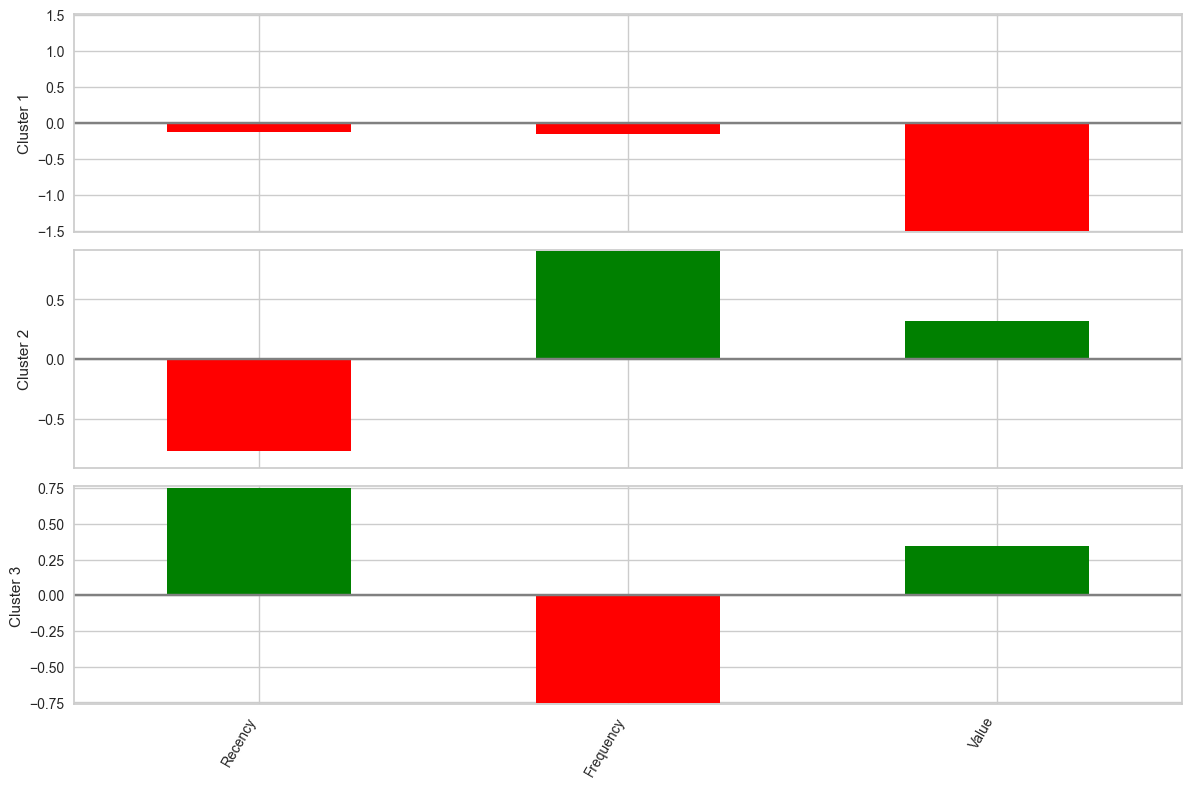

In [91]:
fig,axes = plt.subplots(nrows=3, figsize=(12,8), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [92]:
(
  rfv[["Recency","Frequency","Value"]].assign(cluster=labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2
Recency,74.402284,26.189461,160.600863
Frequency,2.795685,8.001184,1.492988
Value,6.167924,34.936968,45.379071


METRICAS DE AVALIAÇÃO

In [93]:
metrics = {
"Silhouette Score": silhouette_score(rfv_transform, kmeans.labels_),
"Calinski Score":calinski_harabasz_score(rfv_transform, kmeans.labels_),
"Davies Score":davies_bouldin_score(rfv_transform, kmeans.labels_)
}

In [94]:
pd.DataFrame(metrics, index = ["Cluster 3"])

,Silhouette Score,Calinski Score,Davies Score
Cluster 3,0.336986,2274.56756,1.088932


***CONCLUSÃO***
- Após a criação das metricas RFV, demos inicio a criação do modelo de clusterização. O primeiro passo foi fazer o pre-processamento dos dados onde utilizamos o metodo PowerTransformer para fazer a normalização, a escolha dele foi devido ao dados não seguir uma distribuição normal e serem de escala diferentes.
- Como estamos trabalhando com agrupamento de caracteristicas, utilizamos o modelo de machine learning **K-means**, que basicamento consiste em separar os dados em **k** grupos, onde as caracteriscas se assemelham entre si.
- O modelo K-means, tem como premissa que nós determinamos a quantidade de grupos que iremos separar, então utilizamos o metodo de Kelbow para decidir, chegamos a conclusão que o k=3 define melhor o modelo, após isso treinamos o modelo.

Analise sobre as metricas de avaliação:
- Utilizamos três metricas para avaliar o desempenho do modelo, **Silhouette, Calinski e Davies**
- Silhouette avalia a qualidade do ponto sobre o seu cluster, o quao eles são semlhantes, metrica abaixo de 0.3 é um modelo ruim, entre 0.3 e 0.5 é um modelo e proximos a 1.0 é um modelo ideal, onde os clusters estão bem agrupado.
- Calinski mede a relação entre a dispersão dos pontos dentro dos clusters e a dispersão entre os clusters
- avalia a qualidade do clustering com base na média das razões de similaridade de cada cluster com o cluster que mais se assemelha a ele. Quanto menor, melhor o resultado.